In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#combine into one dataset
mousestudy_combined = mouse_metadata.merge(study_results, how="inner", on=["Mouse ID"])

In [3]:
#Summary Statistics: Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM 
#of the tumor volume for each drug regimen.
#The following creates a new dataframe with the drug regimen and tumor volume columns, then finds summary statistics for each drug
#finally, the summary columns for each drug are joined into the summary statistics dataframe and displayed
tumor_vol_by_drug = mousestudy_combined[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_vol_by_drug_means = tumor_vol_by_drug.groupby("Drug Regimen").mean()
tumor_vol_by_drug_means = tumor_vol_by_drug_means.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) mean"})
tumor_vol_by_drug_median = tumor_vol_by_drug.groupby("Drug Regimen").median()
tumor_vol_by_drug_median = tumor_vol_by_drug_median.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) median"})
tumor_vol_by_drug_std = tumor_vol_by_drug.groupby("Drug Regimen").std()
tumor_vol_by_drug_std = tumor_vol_by_drug_std.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) standard deviation"})
tumor_vol_by_drug_var = tumor_vol_by_drug.groupby("Drug Regimen").var()
tumor_vol_by_drug_var = tumor_vol_by_drug_var.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) variance"})
tumor_vol_by_drug_sem = tumor_vol_by_drug.groupby("Drug Regimen").sem()
tumor_vol_by_drug_sem = tumor_vol_by_drug_sem.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (mm3) SEM"})
tumor_vol_by_drug_summary = tumor_vol_by_drug_means.merge(
    tumor_vol_by_drug_median, how="inner", on=["Drug Regimen"]).merge(
    tumor_vol_by_drug_var, how="inner", on=["Drug Regimen"]).merge(
    tumor_vol_by_drug_std, how="inner", on=["Drug Regimen"]).merge(
    tumor_vol_by_drug_sem, how="inner", on=["Drug Regimen"])
tumor_vol_by_drug_summary

,Tumor Volume (mm3) mean,Tumor Volume (mm3) median,Tumor Volume (mm3) variance,Tumor Volume (mm3) standard deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


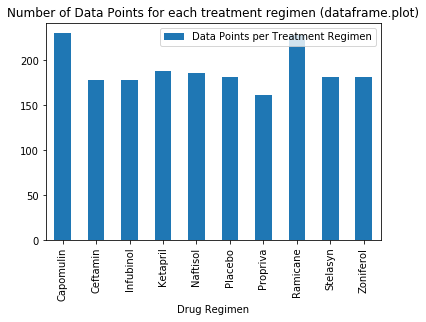

In [4]:
#Number of Data Points for each treatment regimen
#Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot 
#that shows the number of data points for each treatment regimen.
mousestudy_combined_counts = tumor_vol_by_drug.groupby("Drug Regimen").count()
mousestudy_combined_counts = mousestudy_combined_counts.rename(columns={"Tumor Volume (mm3)":"Data Points per Treatment Regimen"})
counts_plot = mousestudy_combined_counts.plot(kind = "bar", title="Number of Data Points for each treatment regimen (dataframe.plot)")
counts_plot.xlabel = "Data Points Per Treatment Regimen"
counts_plot.ylabel = "Drug Regimen"
counts_plot

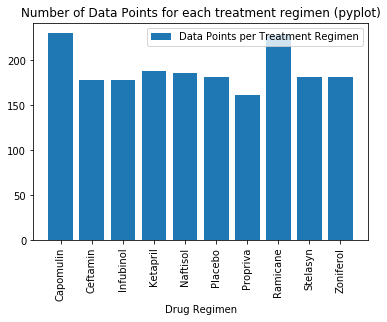

In [5]:
#Number of Data Points for each treatment regimen, but a matplotlib pyplot version
mousestudy_reindex = mousestudy_combined_counts.reset_index()
regimen_counts = mousestudy_reindex["Drug Regimen"].count()
regimen_counts
regcount_x = np.arange(0, regimen_counts, 1)
regcount_y = [value for value in mousestudy_combined_counts["Data Points per Treatment Regimen"]]
regcount_labels = [value for value in mousestudy_reindex["Drug Regimen"]]
plt.bar(regcount_x, regcount_y, data=regcount_y)
plt.xticks(regcount_x, regcount_labels, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.legend(["Data Points per Treatment Regimen"])
plt.title("Number of Data Points for each treatment regimen (pyplot)")
plt.show()

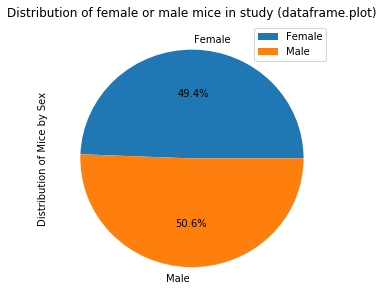

In [6]:
#Distribution of female or male mice in study, pie charts
#Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot 
#that shows the distribution of female or male mice in the study.
#The first uses dataframe.plot()
mfdist_df = mousestudy_combined[["Sex","Mouse ID"]].groupby("Sex").count()
mfdist_df = mfdist_df.rename(columns={"Mouse ID":"Distribution of Mice by Sex"})
mfdist_df.plot(kind = "pie", y="Distribution of Mice by Sex", figsize = (5, 5), autopct = "%1.1f%%", title="Distribution of female or male mice in study (dataframe.plot)")
#figsize set to (5,5) because that's what the pandas documentation had listed for an example and it made this pie chart look good

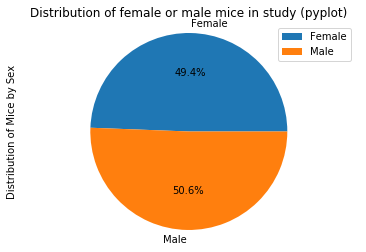

In [7]:
#Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot 
#that shows the distribution of female or male mice in the study.
mfdist_reindex = mfdist_df.reset_index()
mfdist_labels = [value for value in mfdist_reindex["Sex"]]
plt.pie(mfdist_df, labels = mfdist_labels, autopct = "%1.1f%%")
plt.axis("equal")
plt.ylabel("Distribution of Mice by Sex")
plt.legend()
plt.title("Distribution of female or male mice in study (pyplot)")
plt.show()

In [8]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin. 
#Calculate the IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

#first assign the four drug regimen to a list, and return a dataframe with only these values
four_prom_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mousestudy_four_drugs_loc = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"].isin(four_prom_drugs)]
mousestudy_four_drugs_loc
timepoint_series = mousestudy_four_drugs_loc.groupby("Mouse ID")["Timepoint"].max()
maxtimepoints_df = timepoint_series.to_frame()
maxtimepoints_df = maxtimepoints_df.reset_index()
final_tumor_vols = maxtimepoints_df.merge(mousestudy_four_drugs_loc, how="left", on=["Mouse ID", "Timepoint"])
final_tumor_vols = final_tumor_vols[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen"]]
final_tumor_vols = final_tumor_vols.set_index(["Mouse ID"])
final_tumor_vols

,Tumor Volume (mm3),Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a275,62.999356,Ceftamin
a411,38.407618,Ramicane
a444,43.047543,Ramicane
a520,38.810366,Ramicane
a577,57.031862,Infubinol
a644,32.978522,Ramicane
a685,66.083066,Infubinol


In [9]:
#next we'll have to find the IQR
qt3 = final_tumor_vols.quantile(.75)
qt3_val = qt3.iloc[0]
qt1 = final_tumor_vols.quantile(.25)
qt1_val = qt1.iloc[0]
median_qt = final_tumor_vols.quantile(.5)
median_qt_val = median_qt.iloc[0]
iqr =  qt3_val - qt1_val
upper_bound = qt3_val + (1.5*iqr)
lower_bound = qt1_val - (1.5*iqr)
print(f"IQR: {iqr}, Lower Quartile: {qt1_val}, Upper Quartile: {qt3_val}")
print(f"Outliers may exist below {lower_bound}, and above {upper_bound}")

IQR: 22.74251795250001, Lower Quartile: 37.187743802499995, Upper Quartile: 59.930261755000004
Outliers may exist below 3.0739668737499812, and above 94.04403868375002


In [10]:
#Next We'll Return a dataframe of all outliers of final tumor volumes (mm3)
#outliers will be those tumor volumes that that exceed the 3rd quartile by 1.5*IQR or less than the lower quartile by 1.5*IQR
upper_outlier_mice = final_tumor_vols.loc[final_tumor_vols["Tumor Volume (mm3)"] > upper_bound]
lower_outlier_mice = final_tumor_vols.loc[final_tumor_vols["Tumor Volume (mm3)"] < lower_bound]
outlier_df = lower_outlier_mice.append(lower_outlier_mice)
outlier_df

,Tumor Volume (mm3),Drug Regimen
Mouse ID,,


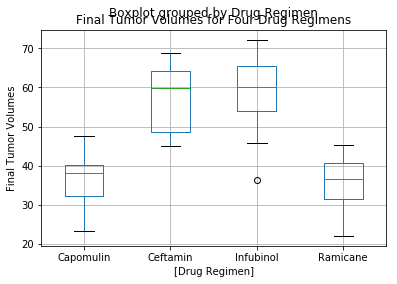

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#y_tumor_axis = final_tumor_vols["Tumor Volume (mm3)"]
#x_drug_axis = final_tumor_vols["Drug Regimen"]
final_tumor_vols.boxplot(by=["Drug Regimen"], column=["Tumor Volume (mm3)"])
plt.title("Final Tumor Volumes for Four Drug Regimens")
plt.ylabel("Final Tumor Volumes")
plt.show()

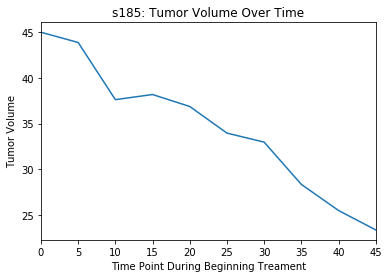

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Capomulin"]
capomulin_s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
s185_xvals = [value for value in capomulin_s185_df["Timepoint"]]
s185_yvals = [value for value in capomulin_s185_df["Tumor Volume (mm3)"]]
plt.plot(s185_xvals, s185_yvals)
plt.xlim(0, max(s185_xvals))
plt.title("s185: Tumor Volume Over Time")
plt.xlabel("Time Point During Beginning Treament")
plt.ylabel("Tumor Volume")
plt.show()

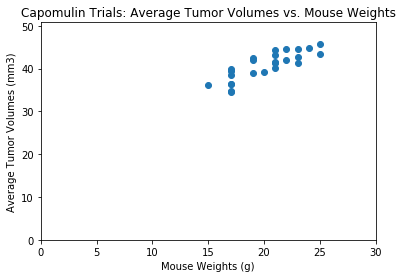

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mice_groups = capomulin_df.groupby(["Mouse ID"]).mean()
avg_tumor_vols_capomulin = [value for value in capomulin_mice_groups["Tumor Volume (mm3)"]]
avg_wgt_capomulin = [value for value in capomulin_mice_groups["Weight (g)"]]
plt.scatter(avg_wgt_capomulin, avg_tumor_vols_capomulin)
plt.ylim(0, max(avg_tumor_vols_capomulin)+5)
plt.xlim(0, max(avg_wgt_capomulin)+5)
plt.ylabel('Average Tumor Volumes (mm3)')
plt.xlabel('Mouse Weights (g)')
plt.title('Capomulin Trials: Average Tumor Volumes vs. Mouse Weights')
plt.show()

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
#for the Capomulin regimen 
correlation = st.pearsonr(avg_tumor_vols_capomulin, avg_wgt_capomulin)
print(f"The correlation coefficient is {round(correlation[0],(2))}")

The correlation coefficient is 0.84


In [15]:
#Linear Regression: this sets up our x and y datasets for the linear regression (because I was getting a float64/int error and decided to move them all to lists of ints)
x_ints = []
y_ints = []
capomulin_mice_groups
x_values = capomulin_mice_groups["Weight (g)"]
for x in x_values:
    x_ints.append(int(x))
y_values = capomulin_mice_groups['Tumor Volume (mm3)']
for y in y_values:
    y_ints.append(int(y))

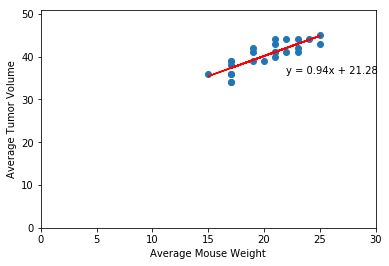

In [16]:
#and now we add the regression line to the scatterplot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_ints, y_ints)
regress_values = [x * slope + intercept for x in x_ints]
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_ints,y_ints)
plt.plot(x_ints,regress_values,"r-")
plt.annotate(equation,(22,36),fontsize=10,color="black")
plt.xlabel('Average Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.ylim(0, max(avg_tumor_vols_capomulin)+5)
plt.xlim(0, max(avg_wgt_capomulin)+5)
plt.show()